# Game Optimization Project Notebook

Authored By: Simon Lidwell

----------

This project aims to explore game winning optimization algorithms for the sake of having fun and having a deeper understanding of how to win commonly played games like Tic-Tac-Toe and Connect4.

I will start with Tic-Tac-Toe as it is a great introduction to game strategy due to the limited number of possible outcomes.

The end of this project will contain a comprehensive analysis of game optimization theory.

## Optimizing Tic-Tac-Toe

In [1]:
from src.utils import TicTacToe

In [40]:
game1 = TicTacToe()

In [48]:
game1.get_or_create_game().model_dump()

{'id': UUID('16814f20-fd00-4457-b7c8-56022fbfbe83'),
 'createdat': datetime.datetime(2024, 12, 11, 13, 2, 5, 330146),
 'winner': None,
 'game_type': <GameType.TIC_TAC_TOE: 'TicTacToe'>,
 'moves': [{'id': UUID('456c665b-955b-49ba-a31d-09b1537b8008'),
   'game_id': UUID('16814f20-fd00-4457-b7c8-56022fbfbe83'),
   'player': 'X',
   'row': 0,
   'col': 1,
   'timestamp': datetime.datetime(2024, 12, 11, 13, 2, 5, 333156)},
  {'id': UUID('a3a5f1b3-5e1e-465e-b78d-9f1176cef302'),
   'game_id': UUID('16814f20-fd00-4457-b7c8-56022fbfbe83'),
   'player': 'O',
   'row': 0,
   'col': 0,
   'timestamp': datetime.datetime(2024, 12, 11, 13, 2, 5, 333156)},
  {'id': UUID('1ed88b20-b70a-464f-93f1-88ca2e553f9f'),
   'game_id': UUID('16814f20-fd00-4457-b7c8-56022fbfbe83'),
   'player': 'X',
   'row': 1,
   'col': 1,
   'timestamp': datetime.datetime(2024, 12, 11, 13, 2, 5, 333156)},
  {'id': UUID('3360ca6e-9814-4e23-bd42-ed5d19e15fa1'),
   'game_id': UUID('16814f20-fd00-4457-b7c8-56022fbfbe83'),
   'playe

In [42]:
game1.print_board()

0  0 | 1 | 2 
   --------- 
1  0 | 1 | 2 
   --------- 
2  0 | 1 | 2 


In [43]:
game1.make_move(player='X', row=0, col=1)

0  0 | X | 2 
   --------- 
1  0 | 1 | 2 
   --------- 
2  0 | 1 | 2 
Depth: 0, is_maximizing: False
Depth: 1, is_maximizing: True
Depth: 2, is_maximizing: False
Depth: 3, is_maximizing: True
Depth: 4, is_maximizing: False
Depth: 5, is_maximizing: True
Depth: 5, is_maximizing: True
Depth: 5, is_maximizing: True
Depth: 6, is_maximizing: False
Depth: 6, is_maximizing: False
Depth: 7, is_maximizing: True
Depth: 4, is_maximizing: False
Depth: 4, is_maximizing: False
Depth: 5, is_maximizing: True
Depth: 6, is_maximizing: False
Depth: 6, is_maximizing: False
Depth: 7, is_maximizing: True
Depth: 5, is_maximizing: True
Depth: 5, is_maximizing: True
Depth: 6, is_maximizing: False
Depth: 7, is_maximizing: True
Depth: 6, is_maximizing: False
Depth: 4, is_maximizing: False
Depth: 5, is_maximizing: True
Depth: 6, is_maximizing: False
Depth: 6, is_maximizing: False
Depth: 7, is_maximizing: True
Depth: 5, is_maximizing: True
Depth: 5, is_maximizing: True
Depth: 3, is_maximizing: True
Depth: 4, is_max

'Player X make your move'

In [44]:
game1.make_move(player='X', row=1, col=1)

0  O | X | 2 
   --------- 
1  0 | X | 2 
   --------- 
2  0 | 1 | 2 
Depth: 0, is_maximizing: False
Depth: 1, is_maximizing: True
Depth: 2, is_maximizing: False
Depth: 3, is_maximizing: True
Depth: 4, is_maximizing: False
Depth: 5, is_maximizing: True
Depth: 4, is_maximizing: False
Depth: 3, is_maximizing: True
Depth: 3, is_maximizing: True
Depth: 4, is_maximizing: False
Depth: 5, is_maximizing: True
Depth: 4, is_maximizing: False
Depth: 5, is_maximizing: True
Depth: 2, is_maximizing: False
Depth: 3, is_maximizing: True
Depth: 3, is_maximizing: True
Depth: 3, is_maximizing: True
Depth: 4, is_maximizing: False
Depth: 5, is_maximizing: True
Depth: 4, is_maximizing: False
Depth: 5, is_maximizing: True
Depth: 2, is_maximizing: False
Depth: 3, is_maximizing: True
Depth: 3, is_maximizing: True
Depth: 4, is_maximizing: False
Depth: 5, is_maximizing: True
Depth: 4, is_maximizing: False
Depth: 5, is_maximizing: True
Depth: 3, is_maximizing: True
Depth: 4, is_maximizing: False
Depth: 5, is_maxi

'Player X make your move'

In [49]:
game1.make_move(player='X', row=2, col=2)

0  O | X | X 
   --------- 
1  0 | X | 2 
   --------- 
2  O | O | X 
Depth: 0, is_maximizing: False
Depth: 0, is_maximizing: False
Depth: 1, is_maximizing: True
AI chooses to place at (1, 0)
0  O | X | X 
   --------- 
1  O | X | 2 
   --------- 
2  O | O | X 
Cleaning up game resources.


'Player O wins!'

In [35]:
game1.make_move(player='X', row=1, col=0)

0  O | O | X 
   --------- 
1  X | X | 2 
   --------- 
2  O | X | 2 
Depth: 0, is_maximizing: False
Depth: 1, is_maximizing: True
Depth: 0, is_maximizing: False
Depth: 1, is_maximizing: True
AI chooses to place at (1, 2)
0  O | O | X 
   --------- 
1  X | X | O 
   --------- 
2  O | X | 2 


'Player X make your move'

In [37]:
game1.make_move(player='X', row=2, col=2)

0  O | O | X 
   --------- 
1  X | X | O 
   --------- 
2  O | X | X 
Cleaning up game resources.


'The game is a tie!'

# Game Optimization Data Analysis

So I used the backend to capture all the games and moves data into sqlite. This will allow me to observe trends in the game data.

In [50]:
from src.db.dbinit import engine

import pandas as pd
from sqlalchemy import text

db = engine.connect()
query = text("""
    SELECT games.id, 
           games.createdat, 
           games.winner, 
           games.game_type, 
           moves.id AS move_id,
           moves.player, 
           moves.row,
           moves.col,
           moves.timestamp
    FROM games
        INNER JOIN moves ON games.id = moves.game_id
    WHERE games.winner IS NOT NULL
    ORDER BY createdat ASC
""")
result_df = pd.read_sql(query, con=db)
db.close()

result_df

2024-12-11 08:20:45,725 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-12-11 08:20:45,726 INFO sqlalchemy.engine.Engine 
    SELECT games.id, 
           games.createdat, 
           games.winner, 
           games.game_type, 
           moves.id AS move_id,
           moves.player, 
           moves.row,
           moves.col,
           moves.timestamp
    FROM games
        INNER JOIN moves ON games.id = moves.game_id
    WHERE games.winner IS NOT NULL
    ORDER BY createdat ASC

2024-12-11 08:20:45,727 INFO sqlalchemy.engine.Engine [cached since 472.4s ago] ()
2024-12-11 08:20:45,741 INFO sqlalchemy.engine.Engine ROLLBACK


,id,createdat,winner,game_type,move_id,player,row,col,timestamp
0,ff196d7f-664a-48c8-8a24-19697877242d,2024-12-09 02:01:17.442061,Tie,TicTacToe,1ef0ca71-f1f8-4ec0-8655-36d971c1812d,X,1,1,2024-12-09 02:01:17.444062
1,ff196d7f-664a-48c8-8a24-19697877242d,2024-12-09 02:01:17.442061,Tie,TicTacToe,f8eda28d-6e9d-4c29-9159-a19e9b914187,O,0,0,2024-12-09 02:01:17.444062
2,ff196d7f-664a-48c8-8a24-19697877242d,2024-12-09 02:01:17.442061,Tie,TicTacToe,c60939f9-9bff-4bb1-8636-2698cc6edd6b,X,0,1,2024-12-09 02:01:17.444062
3,ff196d7f-664a-48c8-8a24-19697877242d,2024-12-09 02:01:17.442061,Tie,TicTacToe,fb7f9664-9355-4446-946a-d84396c14912,O,2,1,2024-12-09 02:01:17.444062
4,ff196d7f-664a-48c8-8a24-19697877242d,2024-12-09 02:01:17.442061,Tie,TicTacToe,25d09eac-9e1d-498e-8978-f846eab5f7ec,X,1,0,2024-12-09 02:01:17.444062
...,...,...,...,...,...,...,...,...,...
134,16814f20-fd00-4457-b7c8-56022fbfbe83,2024-12-11 13:02:05.330146,O,TicTacToe,3360ca6e-9814-4e23-bd42-ed5d19e15fa1,O,2,1,2024-12-11 13:02:05.333156
135,16814f20-fd00-4457-b7c8-56022fbfbe83,2024-12-11 13:02:05.330146,O,TicTacToe,2f7e7e6a-f0ac-40c9-9646-d204ee8cca3c,X,0,2,2024-12-11 13:02:05.333156
136,16814f20-fd00-4457-b7c8-56022fbfbe83,2024-12-11 13:02:05.330146,O,TicTacToe,3a1a4ee6-0589-4676-84cb-aaf1cc8b03bb,O,2,0,2024-12-11 13:02:05.333156
137,16814f20-fd00-4457-b7c8-56022fbfbe83,2024-12-11 13:02:05.330146,O,TicTacToe,477a0c7c-f09f-40d8-81e1-00abf571bb81,X,2,2,2024-12-11 13:02:05.333156


Something that I am interested in is what is the most common second move based on any first move? Like does minimax arbitrarily decide the second move if multiple results have the same score?

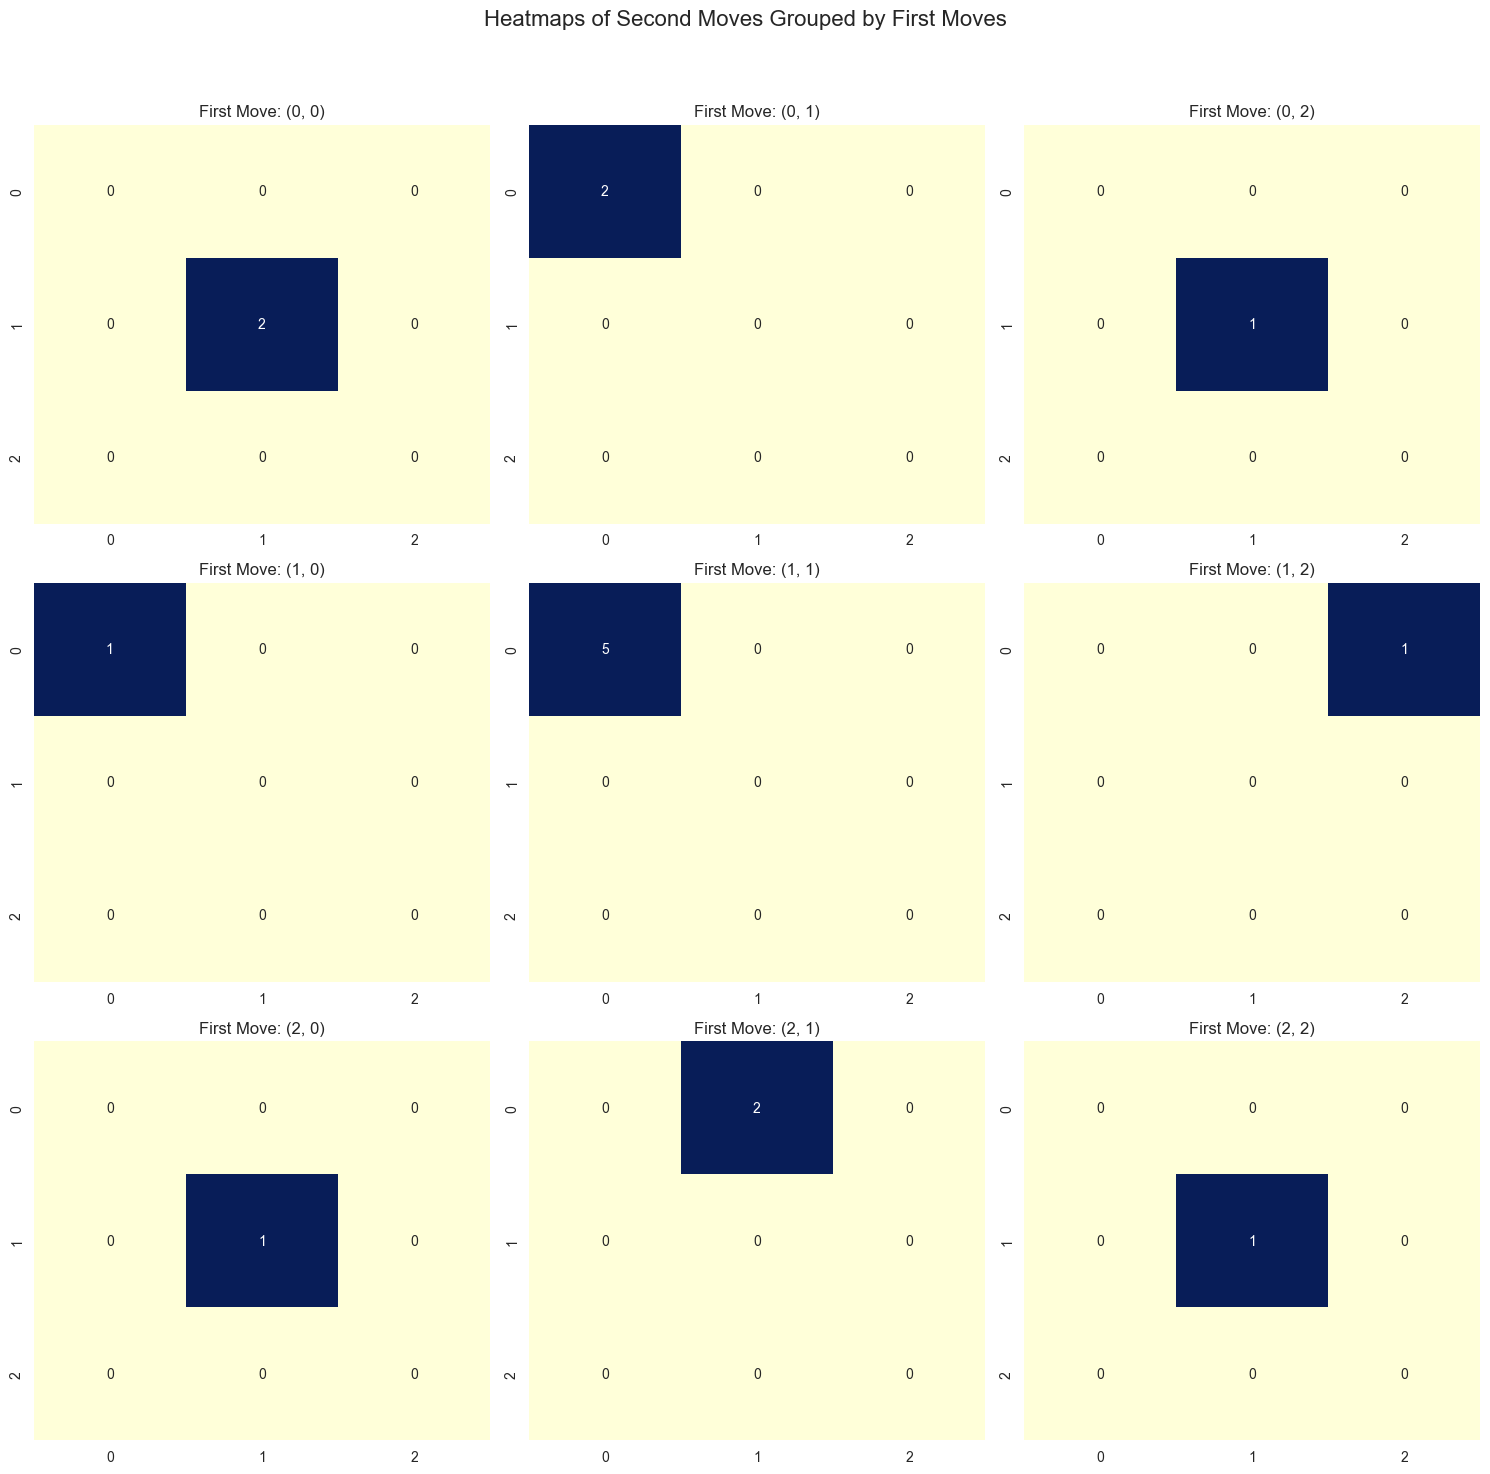

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

first_moves = result_df.groupby("id").agg(
    row_first=("row", "first"),
    col_first=("col", "first")
).reset_index()

second_moves = (
    result_df
    .groupby("id")
    .nth(1)  # nth(1) gives the second row in each group
    .reset_index()
    .rename(columns={"row": "row_second", "col": "col_second"})
)

merged_moves = pd.merge(first_moves, second_moves[["id", "row_second", "col_second"]], on="id", how="inner")

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Heatmaps of Second Moves Grouped by First Moves", fontsize=16)

for row in range(3):
    for col in range(3):
        filtered_moves = merged_moves[(merged_moves["row_first"] == row) & (merged_moves["col_first"] == col)]

        heatmap_data = np.zeros((3, 3), dtype=int)
        for _, move in filtered_moves.iterrows():
            r2 = move["row_second"]
            c2 = move["col_second"]
            if pd.notnull(r2) and pd.notnull(c2):
                heatmap_data[int(r2), int(c2)] += 1

        # noinspection PyTypeChecker
        sns.heatmap(
            heatmap_data, 
            annot=True, 
            fmt="d", 
            cmap="YlGnBu", 
            ax=axes[row, col], 
            cbar=False,
            xticklabels=[0, 1, 2], 
            yticklabels=[0, 1, 2]
        )
        axes[row, col].set_title(f"First Move: ({row}, {col})")

# noinspection PyTypeChecker
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()